In [2]:
import json
import cv2
import matplotlib.pyplot as plt

In [ ]:
# register_coco_instances("cityscapes_train", {}, "datasets/cityscapes/annotations/instancesonly_filtered_gtFine_train.json", "datasets/cityscapes/")
# register_coco_instances("cityscapes_val", {}, "datasets/cityscapes/annotations/instancesonly_filtered_gtFine_val.json", "datasets/cityscapes/")
# register_coco_instances("cityscapes_foggy_train", {}, "datasets/cityscapes_foggy/annotations/instancesonly_filtered_gtFine_train_foggyALL.json", "datasets/cityscapes_foggy/")
# register_coco_instances("cityscapes_foggy_val", {}, "datasets/cityscapes_foggy/annotations/instancesonly_filtered_gtFine_val_foggyALL.json", "datasets/cityscapes_foggy/")

In [31]:
foggy = False
s = 'val'

if foggy:
    coco_loc = f'../datasets/cityscapes_foggy/annotations/instancesonly_filtered_gtFine_{s}_foggyALL.json'
    base_path = '../datasets/cityscapes_foggy/'
else:
    base_path = '../datasets/cityscapes/'
    coco_loc = f'../datasets/cityscapes/annotations/instancesonly_filtered_gtFine_{s}.json'

js = json.load(open(coco_loc, 'r'))
js.keys()

dict_keys(['images', 'categories', 'annotations'])

In [32]:
js['images'][0]

{'id': 2975,
 'width': 2048,
 'height': 1024,
 'file_name': 'leftImg8bit/val/frankfurt/frankfurt_000001_060422_leftImg8bit.png',
 'seg_file_name': 'frankfurt_000001_060422_gtFine_instanceIds.png'}

{'id': 2985, 'width': 2048, 'height': 1024, 'file_name': 'leftImg8bit/val/frankfurt/frankfurt_000001_057954_leftImg8bit.png', 'seg_file_name': 'frankfurt_000001_057954_gtFine_instanceIds.png'}


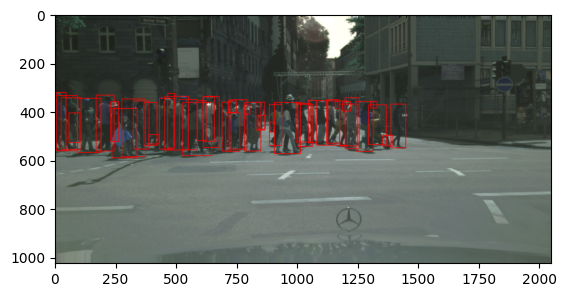

In [35]:
sample_im = js['images'][10]
print(sample_im)

# annotations for sampel image
sample_anns = [ann for ann in js['annotations'] if ann['image_id'] == sample_im['id']]

img = cv2.imread(base_path + sample_im['file_name'])
# plot rectangles for each annotation
for ann in sample_anns:
    bbox = ann['bbox']
    bbox = [int(x) for x in bbox]
    img = cv2.rectangle(img, (bbox[0], bbox[1]), (bbox[0]+bbox[2], bbox[1]+bbox[3]), (255, 0, 0), 2)

plt.imshow(img)